In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1

In [3]:
matriz = np.ones(100).reshape(10, 10)

# Preenche as diagonais da linha 3 a 9
np.fill_diagonal(matriz[3:], np.arange(1, 8) * 5)
np.fill_diagonal(matriz[4:], np.arange(1, 7) * 5)
np.fill_diagonal(matriz[5:], np.arange(1, 6) * 5)
np.fill_diagonal(matriz[6:], np.arange(1, 5) * 5)
np.fill_diagonal(matriz[7:], np.arange(1, 4) * 5)
np.fill_diagonal(matriz[8:], np.arange(1, 3) * 5)
np.fill_diagonal(matriz[9:], np.arange(1, 2) * 5)



# Preenche as diagonais centrais
np.fill_diagonal(matriz[:, 2:], 3)
np.fill_diagonal(matriz[:, 1:], 2)
np.fill_diagonal(matriz, 1)
matriz[5, 5] = 3
matriz[6, 6] = 3
matriz[7, 7] = 3
matriz[8, 8] = 3
matriz[9, 9] = 3
np.fill_diagonal(matriz[1:], 2)
np.fill_diagonal(matriz[2:], 3)



# Preenche as diagonais da coluna 3 a 9
np.fill_diagonal(matriz[:, 3:], np.arange(1, 8) * 5)
np.fill_diagonal(matriz[:, 4:], np.arange(1, 7) * 5)
np.fill_diagonal(matriz[:, 5:], np.arange(1, 6) * 5)
np.fill_diagonal(matriz[:, 6:], np.arange(1, 5) * 5)
np.fill_diagonal(matriz[:, 7:], np.arange(1, 4) * 5)
np.fill_diagonal(matriz[:, 8:], np.arange(1, 3) * 5)
np.fill_diagonal(matriz[:, 9:], np.arange(1, 2) * 5)

# 2

Média diagonal principal: 43.4
Média diagonal secundária: 42.8
Média linhas: [70.9 61.5 41.1 43.  52.5 42.8 34.5 54.7 45.7 37. ]
Média colunas: [60.8 46.1 56.5 32.9 54.6 55.3 33.8 38.6 59.4 45.7]


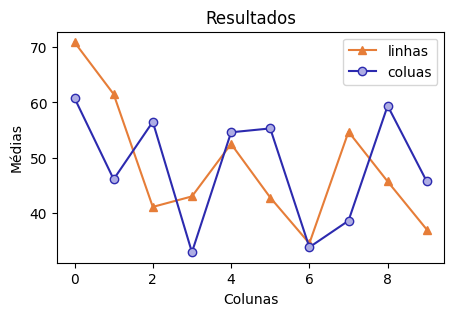

In [4]:
vetor = np.array([[ 44,  70,  98,  63,  30,  96,  26,  94,  20,  67],
    [ 22,  79,  53,  16,  46,  63,  45,  61,  66,  10],
    [ 71,  96,  68,  14,  86,  99,   1,  44,  66,  20],
    [ 92,  40,   0,  12,  91,   1,   9,  19,  60,   5],
    [ 53,  46,  65,  73,  29,   0,  89, 100,  13,  78],
    [ 81,  16,  21, 100,  36,  51,  38,  85,  90,  35],
    [ 91,  70,   8,  20,  60,  40,  14,  16,   0,  19],
    [ 87,  10,  24,  40,  62,   5,  32,  28,  69,  29],
    [ 94,  88,  40,   4,  85,  61,  30,  68,  63,  61],
    [ 74, 100,  34,  88,   0,  12,  61,  32,  10,  46]])

# Média da diagonal principal
media_diagonal_princpal = np.mean(np.diagonal(vetor))
print('Média diagonal principal:', media_diagonal_princpal)

# Média da diagonal secundária
media_dagonal_secundaria = np.mean(np.diagonal(np.flip(vetor, axis=1)))
print('Média diagonal secundária:', media_dagonal_secundaria)

# Média das linhas
media_linhas = np.mean(vetor, axis=0)
print('Média linhas:', media_linhas)

# Média das colunas
media_colunas = np.mean(vetor, axis=1)
print('Média colunas:', media_colunas)



# Gŕafico
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(media_linhas, color='#e67d38', marker='^', label='linhas')
ax.plot(media_colunas, color='#2c2aaf', markerfacecolor='#aeade4', marker='o', label='coluas')
ax.set_title('Resultados')
ax.set_ylabel('Médias')
ax.set_xlabel('Colunas')
ax.legend()
plt.show()

# 3

In [5]:
# Cria os DataFrames
df1 = pd.read_csv('CAR_INFO.csv', sep=',')
df2 = pd.read_csv('CAR_VALUES.csv', sep=',')

# Une os DataFrames e cria um .csv
df = df1.assign(year=df2['year'], selling_price=df2['selling_price'], km_driven=df2['km_driven'])
df.to_csv('cars.csv')

# Informações do DataFrame final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   object
 8   km_driven      4340 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


# 4

In [6]:
# Cria uma série para a coluna 'marca' e outra para a coluna 'selling_price' com os valores corrigidos
marca = pd.Series(list(map(lambda x: x.split(' ')[0], list(df['name']))))
selling_price = pd.Series(list(map(lambda x: int(x.split(' ')[1]), list(df2['selling_price']))))

# Cria um novo DataFrame com os valores corrigidos
df = df1.assign(year=df2['year'], selling_price=selling_price, km_driven=df2['km_driven'], marca=marca)



indices = []
valor_medio = {}
valor_total = {}
# Loop que percorre os valores únicos da coluna 'marca'
for marca in set(df['marca']):

    # Lista de valores que será usada para criar uma série e fazer a média
    lista = []

    # Loop que percorre as linhas do DataFrame
    for idx, row in df.iterrows():
        # Se a marca (que está no nome) for igual a marca, da append na lista de valores com o valor do carro 
        if row[1].split(' ')[0] == marca:
            lista.append(row[7])
        # Adiciona o índice de todas as linhas com 0 na coluna 'selling_price' a uma lista (motivo: fazer um for com menos iterações)
        if row[7] == 0:
            indices.append(idx)
            
    # Atualiza o dicionário com os valores médios e totais de cada marca
    valor_medio.update({marca: int(pd.Series(lista).mean())})
    valor_total.update({marca: pd.Series(lista).sum()})



# Muda os valores da coluna 'selling_price' == 0 para a média das marcas a partir da lista de indices
indices = list(set(indices))
for i in indices:
    df.loc[i, 'selling_price'] = valor_medio[df.loc[i, 'marca']]

# Cria um .csv com os dados corrigidos e mostra as infos do DataFrame
df.to_csv('cars.csv', index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   int64 
 8   km_driven      4340 non-null   int64 
 9   marca          4340 non-null   object
dtypes: int64(4), object(6)
memory usage: 339.2+ KB


# 5

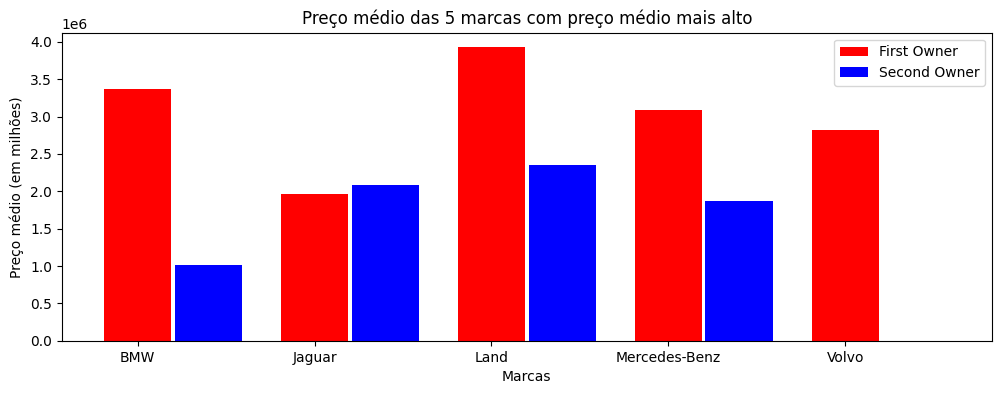

In [7]:
# Lê o arquivo
df_copia = pd.read_csv('cars.csv')



# Organiza o dicionário de valores médios por ordem de maior ao menor
valor_medio = dict(sorted(valor_medio.items(), key=lambda x: x[1], reverse=True))
valor_total = dict(sorted(valor_total.items(), key=lambda x: x[1], reverse=True))



# Itera sobre as chaves do dicionário de valores médios e também sobre o dataset para separar os dados de first e second owner
aux = {}
for marca in valor_medio.keys():
    
    # Listas que serão usadas para calcular o valor total pelo tipo de dono
    first_owner = []
    second_owner = []
    # Quantidades para fazer a divisão
    qtd_first = 0
    qtd_second = 0

    for idx, row in df_copia.iterrows():
        if row[9] == marca:
            # Separa os valores de First Owner
            if row[5] == 'First Owner':
                first_owner.append(row[7])
                qtd_first += 1
            # Separa os valores de Second Owner
            if row[5] == 'Second Owner':
                second_owner.append(row[7])
                qtd_second += 1
    
    # Separa os valores em tuplas e grava em um dicionário auxiliar evitando 'nan' na saída
    if len(first_owner) == 0 or len(second_owner) == 0:
        if len(first_owner) == 0:
            aux.update({marca: (0, pd.Series(second_owner, dtype=int).mean())})
        if len(second_owner) == 0:
            aux.update({marca: (pd.Series(first_owner, dtype=int).mean(), 0)})
    else:
        aux.update({marca: (pd.Series(first_owner, dtype=int).mean(), pd.Series(second_owner, dtype=int).mean())})



# Insere os dados do dicionário auxiliar no dicionário que será usado para plotar o gráfico
dados_grafico = {}
for i, nome in enumerate(aux.keys()):
    if i < 5:
        dados_grafico.update({nome: aux[nome]})

# Organiza o dicionário por ordem alfabética das chaves
dados_grafico = dict(sorted(dados_grafico.items()))



# Plotagem do gráfico de barras
x = list(dados_grafico.keys())
y1 = list(map(lambda x: dados_grafico.get(x)[0], dados_grafico))
y2 = list(map(lambda x: dados_grafico.get(x)[1], dados_grafico))

# Configuração do gráfico
fig, ax = plt.subplots(figsize =(12, 4))
ax.bar(x, y1, width=0.38, color='r', label='First Owner')
ax.bar(np.arange(len(x)) + 0.4, y2, width=0.38, color='b', label='Second Owner')


ax.set_title('Preço médio das 5 marcas com preço médio mais alto')
ax.set_xlabel('Marcas')
ax.set_ylabel('Preço médio (em milhões)')
ax.legend()
plt.show()


# 6

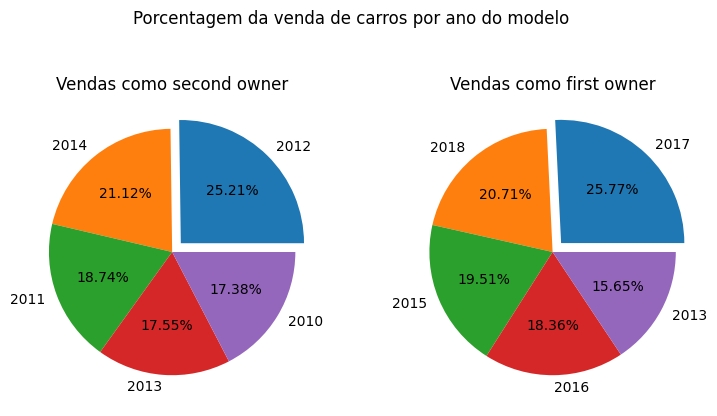

In [8]:
# Loop que pega todos os valores do campo 'year'
anos = []
for idx, row in df.iterrows():
    anos.append(int(row[6]))
anos = set(anos)



# Loop que percorre a lista de anos e o dataset
first_owner = {}
second_owner = {}

for ano in anos:
    # Contadores de venda por dono
    count_first_owner = 0
    count_second_owner = 0

    for idx, row in df.iterrows():
        # Se os anos coincidirem, entra na condição do dono
        if ano == int(row[6]):
            if row[5] == 'First Owner':
                count_first_owner += 1
                first_owner.update({str(ano): count_first_owner})
            elif row[5] == 'Second Owner':
                count_second_owner += 1
                second_owner.update({str(ano): count_second_owner})



# Organiza os valores dos dicionários em ordem de maior ao menor
first_owner = dict(sorted(first_owner.items(), key=lambda x: x[1], reverse=True))
second_owner = dict(sorted(second_owner.items(), key=lambda x: x[1], reverse=True))



# Pega o top 5 do dicionário first_owner
aux_first = {}
first_total = 0

for idx, itens in enumerate(first_owner.items()):
    if idx < 5:
        aux_first.update({itens[0]: itens[1]})
        first_total = first_total + itens[1]
first_owner = aux_first

# Pega o top 5 do dicionário second_owner
aux_second = {}
second_total = 0
for idx, itens in enumerate(second_owner.items()):
    if idx < 5:
        aux_second.update({itens[0]: itens[1]})
        second_total = second_total + itens[1]
second_owner = aux_second



# Configurações e plotagem do gráfico
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
fig.suptitle('Porcentagem da venda de carros por ano do modelo', y=1.1)

# Gráfico First Owner
axes[1].pie(first_owner.values(), labels=first_owner.keys(), autopct='%1.2f%%', explode=(0.1, 0, 0, 0, 0))
axes[1].set_title('Vendas como first owner')
axes[0].pie(second_owner.values(), labels=second_owner.keys(), autopct='%1.2f%%', explode=(0.1, 0, 0, 0, 0))
axes[0].set_title('Vendas como second owner')
plt.show()

# 7

In [9]:
df = pd.read_csv('cars.csv')



# Separa os nomes de carros únicos
nomes_carros = []
for idx, row in df.iterrows():
    nomes_carros.append(row[1])
nomes_carros = list(set(nomes_carros))



# Separa os dados de km_driven de cada carro
first_owner = {}
second_owner = {}
for nome in nomes_carros:
    # Listas de km por tipo de dono
    km_first = []
    km_second = []
    for idx, row in df.iterrows():
        if nome == row[1]:
            if row[5] == 'First Owner':
                #first_owner.update({nome: km_first.append(row[8])})
                km_first.append(int(row[8]))
                print(nome, km_first)
            elif row[5] == 'Second Owner':
                #second_owner.update({nome: km_second.append(row[8])})
                #print(km_second.append(row[8]))
                pass

#display(dict(sorted(first_owner.items(), key=lambda x: x[1], reverse=True)))
display(first_owner)


Tata Indica Vista Terra TDI BSIII [89255]
Honda City i VTEC VX [41000]
Hyundai i20 1.2 Asta [10000]
Hyundai i20 1.2 Asta [10000, 74113]
Hyundai i20 1.2 Asta [10000, 74113, 10000]
Hyundai i20 1.2 Asta [10000, 74113, 10000, 72000]
Honda City i DTEC VX [90000]
Honda City i DTEC VX [90000, 110000]
Honda City i DTEC VX [90000, 110000, 130000]
Honda City i DTEC VX [90000, 110000, 130000, 50000]
Honda City i DTEC VX [90000, 110000, 130000, 50000, 100000]
Honda City i DTEC VX [90000, 110000, 130000, 50000, 100000, 40000]
Mahindra Xylo D2 [70000]
Daewoo Matiz SD [50000]
Honda City i VTEC V [66521]
Honda City i VTEC V [66521, 28205]
Honda City i VTEC V [66521, 28205, 50000]
Honda City i VTEC V [66521, 28205, 50000, 20000]
Honda City i VTEC V [66521, 28205, 50000, 20000, 66521]
Honda City i VTEC V [66521, 28205, 50000, 20000, 66521, 138925]
Honda City i VTEC V [66521, 28205, 50000, 20000, 66521, 138925, 10000]
Honda Amaze S AT i-Vtech [7900]
Honda Amaze S AT i-Vtech [7900, 15000]
Maruti Wagon R L

KeyboardInterrupt: 

In [47]:
# Separa os nomes de carros únicos
nomes_carros = []
for idx, row in df.iterrows():
    nomes_carros.append(row[1])
nomes_carros = list(sorted(set(nomes_carros)))



aux_first = []
aux_second = []
for idx, row in df.iterrows():
    if row[5] == 'First Owner':
        aux_first.append([row[5], row[1], row[8]])
    elif row[5] == 'Second Owner':
        aux_second.append([row[5], row[1], row[8]])
    #teste.append(list(map(lambda x: teste.update({x}), row)))



first_km_total = {}
first_owner = {}
# Separa os dados de First Owner
for nome in nomes_carros:
    km_rodados = []
    for coluna in aux_first:
        if nome == coluna[1]:
            km_rodados.append(int(coluna[2]))
    first_km_total.update({nome: int(pd.Series(km_rodados).sum())})
    first_owner.update({nome: km_rodados})

# Separa os dados de Second Owner
first_km_total = {}
second_owner = {}
for nome in nomes_carros:
    km_rodados = []
    for coluna in aux_second:
        if nome == coluna[1]:
            km_rodados.append(int(coluna[2]))
    first_km_total.update({nome: int(pd.Series(km_rodados).sum())})
    second_owner.update({nome: km_rodados})

first_owner = dict()
first_owner
#teste = list(filter(lambda x: x[1] == 'Honda Amaze VX i-DTEC', first_owner))


/tmp/ipykernel_6540/2750629749.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  first_km_total.update({nome: int(pd.Series(km_rodados).sum())})
/tmp/ipykernel_6540/2750629749.py:39: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  first_km_total.update({nome: int(pd.Series(km_rodados).sum())})


{'Ambassador CLASSIC 1500 DSL AC': [],
 'Ambassador Classic 2000 Dsz': [],
 'Ambassador Grand 1800 ISZ MPFI PW CL': [],
 'Audi A4 1.8 TFSI': [],
 'Audi A4 2.0 TDI': [58000],
 'Audi A4 2.0 TDI 177 Bhp Premium Plus': [53000, 53000],
 'Audi A4 3.0 TDI Quattro': [86000,
  86000,
  86000,
  86000,
  86000,
  86000,
  86000,
  86000,
  86000,
  86000,
  86000,
  86000],
 'Audi A4 30 TFSI Technology': [22000, 22000],
 'Audi A4 35 TDI Premium': [],
 'Audi A4 35 TDI Premium Plus': [17000],
 'Audi A4 New  2.0 TDI Multitronic': [42215],
 'Audi A5 Sportback': [1500],
 'Audi A6 2.0 TDI  Design Edition': [50000, 102354, 102354],
 'Audi A6 2.0 TDI Premium Plus': [58500,
  58500,
  58500,
  58500,
  58500,
  58500,
  58500,
  58500,
  58500,
  58500,
  58500],
 'Audi A6 2.7 TDI': [46000],
 'Audi A6 2.8 FSI': [],
 'Audi A8 4.2 TDI': [49000, 49000],
 'Audi A8 L 3.0 TDI quattro': [],
 'Audi Q3 2.0 TDI Quattro Premium Plus': [127643, 127643],
 'Audi Q3 35 TDI Quattro Technology': [25000, 36000],
 'Audi Q5

In [ ]:
aux_first

[['First Owner', 'Maruti 800 AC', 70000],
 ['First Owner', 'Maruti Wagon R LXI Minor', 50000],
 ['First Owner', 'Hyundai Verna 1.6 SX', 100000],
 ['First Owner', 'Datsun RediGO T Option', 46000],
 ['First Owner', 'Maruti Alto LX BSIII', 125000],
 ['First Owner', 'Hyundai Xcent 1.2 Kappa S', 25000],
 ['First Owner', 'Hyundai Creta 1.6 VTVT S', 25000],
 ['First Owner', 'Maruti Celerio Green VXI', 78000],
 ['First Owner', 'Chevrolet Sail 1.2 Base', 35000],
 ['First Owner', 'Tata Indigo Grand Petrol', 100000],
 ['First Owner', 'Toyota Corolla Altis 1.8 VL CVT', 25000],
 ['First Owner', 'Maruti 800 AC', 70000],
 ['First Owner', 'Maruti Wagon R LXI Minor', 50000],
 ['First Owner', 'Hyundai Verna 1.6 SX', 100000],
 ['First Owner', 'Datsun RediGO T Option', 46000],
 ['First Owner', 'Maruti Alto LX BSIII', 125000],
 ['First Owner', 'Hyundai Xcent 1.2 Kappa S', 25000],
 ['First Owner', 'Hyundai Creta 1.6 VTVT S', 25000],
 ['First Owner', 'Maruti Celerio Green VXI', 78000],
 ['First Owner', 'Chev

[1, 2, 2, 2, 5, 5, 6, 7, 7, 8, 8, 8, 8, 8, 9, 10, 10, 12, 14, 14, 14, 14, 14, 14, 14]


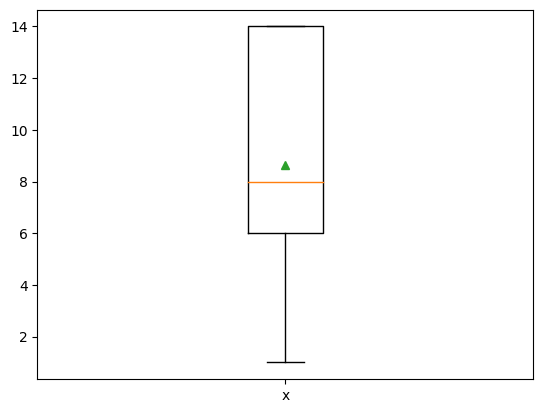

In [ ]:
import random as rand

fig, ax = plt.subplots()

x = np.random.randint(low=1, high=15, size=25)

labels = ['x']


print(sorted(x))
ax.boxplot(x, labels=labels, showmeans=True, showfliers=True,)
plt.show()


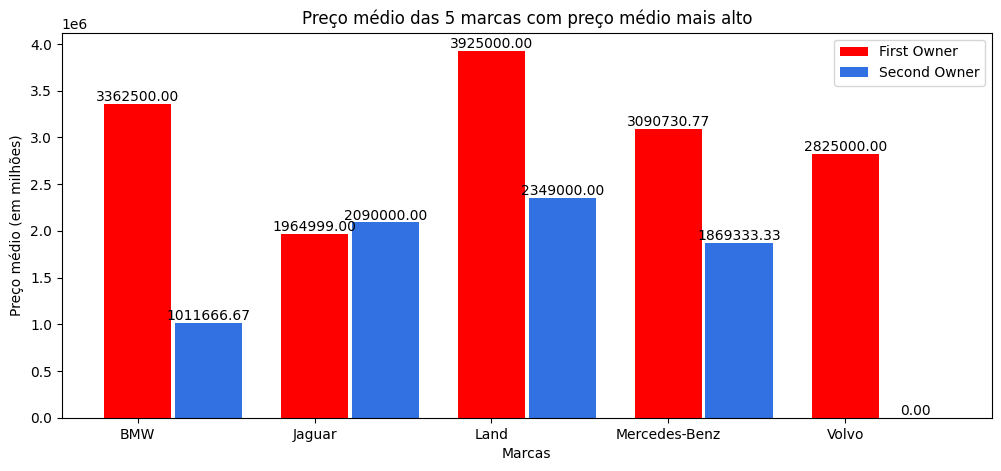

In [46]:
# Lê o arquivo
df_copia = pd.read_csv('cars.csv')



# Organiza o dicionário de valores médios por ordem de maior ao menor
valor_medio = dict(sorted(valor_medio.items(), key=lambda x: x[1], reverse=True))
valor_total = dict(sorted(valor_total.items(), key=lambda x: x[1], reverse=True))



# Itera sobre as chaves do dicionário de valores médios e também sobre o dataset para separar os dados de first e second owner
aux = {}
for marca in valor_medio.keys():
    
    # Listas que serão usadas para calcular o valor total pelo tipo de dono
    first_owner = []
    second_owner = []
    # Quantidades para fazer a divisão
    qtd_first = 0
    qtd_second = 0

    for idx, row in df_copia.iterrows():
        if row[9] == marca:
            # Separa os valores de First Owner
            if row[5] == 'First Owner':
                first_owner.append(row[7])
                qtd_first += 1
            # Separa os valores de Second Owner
            if row[5] == 'Second Owner':
                second_owner.append(row[7])
                qtd_second += 1
    
    # Separa os valores em tuplas e grava em um dicionário auxiliar evitando 'nan' na saída
    if len(first_owner) == 0 or len(second_owner) == 0:
        if len(first_owner) == 0:
            aux.update({marca: (0, pd.Series(second_owner, dtype=int).mean())})
        if len(second_owner) == 0:
            aux.update({marca: (pd.Series(first_owner, dtype=int).mean(), 0)})
    else:
        aux.update({marca: (pd.Series(first_owner, dtype=int).mean(), pd.Series(second_owner, dtype=int).mean())})



# Insere os dados do dicionário auxiliar no dicionário que será usado para plotar o gráfico
dados_grafico = {}
for i, nome in enumerate(aux.keys()):
    if i < 5:
        dados_grafico.update({nome: aux[nome]})

# Organiza o dicionário por ordem alfabética das chaves
dados_grafico = dict(sorted(dados_grafico.items()))



# Gráfico
x = list(dados_grafico.keys())
y1 = list(map(lambda x: dados_grafico.get(x)[0], dados_grafico))
y2 = list(map(lambda x: dados_grafico.get(x)[1], dados_grafico))

# Configurações do gráfico
fig, ax = plt.subplots(figsize =(12, 5))
barra_vermelha = ax.bar(x, y1, width=0.38, color='r', label='First Owner')
barra_azul = ax.bar(np.arange(len(x)) + 0.4, y2, width=0.38, color='#3171E2', label='Second Owner')
ax.set_title('Preço médio das 5 marcas com preço médio mais alto')
ax.set_xlabel('Marcas')
ax.set_ylabel('Preço médio (em milhões)')
ax.bar_label(barra_vermelha, fmt='%.2f')
ax.bar_label(barra_azul, fmt='%.2f')
ax.legend()

plt.show()